In [29]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

In [30]:
with open('Tag_Text_Files/tags(1s active,1s down)(autosave apk).txt', 'r') as file:
    reader = csv.reader(file)

    data = []             # Initialize empty list
    database = dict()
    recent_EPC = ''
    Time_Or_Data = True   # Time is true, Data is false

    for l in reader:
        line = l[0]
         
        if len(line)==24: # If it is an EPC
            database[line] = [[],[]]
            recent_EPC = line
        
        elif line == '[':
            data = []

        elif line == ']': # End of list
            if len(data)!=0:
                if Time_Or_Data:
                    database[recent_EPC][0] = data
                    Time_Or_Data = False
                else:
                    database[recent_EPC][1] = data
                    Time_Or_Data = True
            data = []

        elif len(line)==8: # If it is a time stamp
            h,m,s = line.split(':')

            if int(h)>20:
                day=1
            else:
                day=2

            data.append(datetime.datetime(1900, 1, day,int(h),int(m),int(s)))
        
        elif line ==' ':
            pass

        else: # If it is a data point
            try:
                data.append(float(line))
            except:
                pass

num = []
for k,v in database.items():
    num.append(len(v[1]))
print("Number of Tags each unique Tag was Read for _tags(both at RT)(1s Active,5s Down).txt")
print(sorted(num))
print(len(num))

Number of Tags each unique Tag was Read for _tags(both at RT)(1s Active,5s Down).txt
[0, 1, 3, 9, 14, 15, 17, 17, 17, 19, 21, 27, 31, 33, 36, 42, 42, 57, 61, 71, 90, 94, 101, 106, 111, 113, 128, 141, 143, 180, 184, 189, 197, 198, 206, 210, 210, 212, 213, 219, 222, 222, 223, 227, 279, 280, 284, 286, 288, 291, 294, 300, 308, 309, 310, 320, 327, 327, 347, 353, 362, 368, 372, 381, 415, 415, 416, 419, 419, 421, 425, 428, 435, 450, 457, 464, 475, 490, 496, 501, 508, 539, 545, 549, 551, 551, 553, 559, 561, 581, 587, 602, 606, 614, 633, 648, 667, 672, 672, 697, 731, 752, 765, 772, 782, 786, 791, 794, 794, 821, 830, 831, 839, 863, 879, 880, 945, 960, 962, 1004, 1006, 1007, 1027, 1049, 1052, 1070, 1160, 1169, 1175, 1204, 1237, 1245, 1284, 1309, 1337, 1345, 1487, 1499, 1525, 1540, 1565, 1715, 1767, 1867, 1876, 1893, 2243, 2357, 3162, 4903]
150


In [31]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%H:%M:%S')

Text(0.5, 1.0, 'tags(1s active,1s down)(autosave apk).txt, Temperatures over Time')

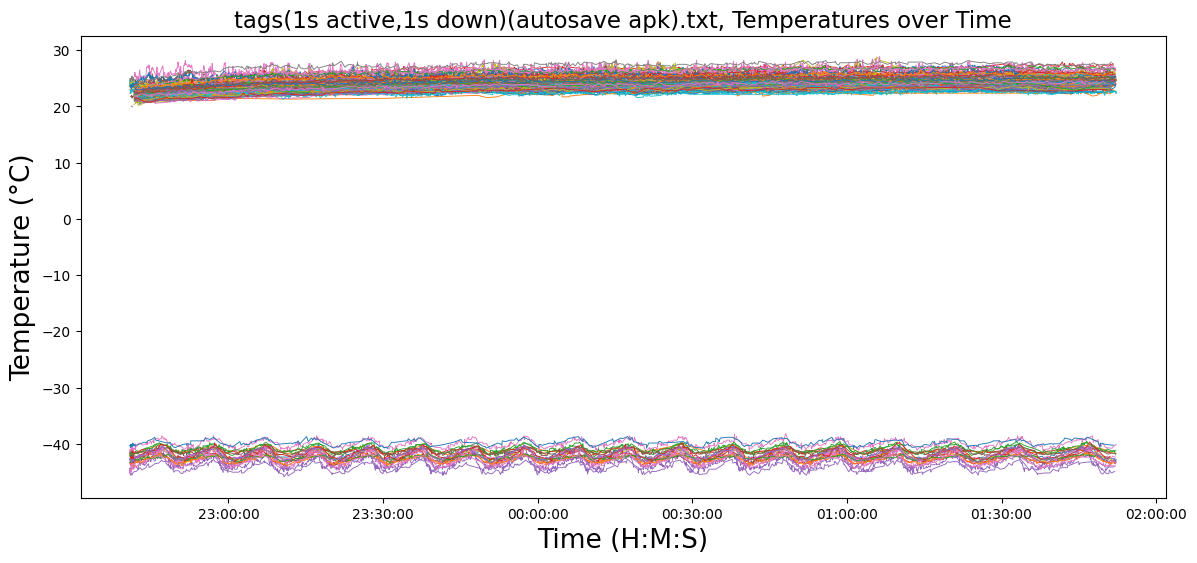

In [32]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.xaxis.set_major_formatter(myFmt)

for k,v in database.items():
    if len(v[1]) > 1:
        ax.plot(v[0], v[1], label=k, linewidth=0.65)

ax.set_ylabel("Temperature (°C)", fontsize=19)
ax.set_xlabel("Time (H:M:S)", fontsize=19)
ax.set_title("tags(1s active,1s down)(autosave apk).txt, Temperatures over Time", fontsize=16.5)
# ax.set_ylim(bottom=-42.0)

In [33]:
vs = dict()
for k,v in database.items():
    v_0, ts = [], []

    for time in v[0]:

        span = time + datetime.timedelta(minutes=1)

        count = 0
        for a,b in zip(v[0],v[1]):
            if a < span and a > time:
                count += 1
        
        v_0.append(count)
        ts.append(time)
    vs[k] = [v_0, ts]

In [34]:
from tqdm import tqdm
start = datetime.datetime(1900,1,1,22,41,0);

times, counts = [], []
tags = []
for i in tqdm(range(10800)):                       # For each second in the test
    span = start + datetime.timedelta(seconds=60)

    count = 0                                      # Count of number of tags read in the minute-long span
    tag_count = 0
    for k,v in database.items():                   # Iterate over each tag in the database

        yes_tag = False                            # Boolean to check if the tag is in the span

        for m,n in zip(v[0],v[1]):                 # For timestamp,temp_value for each tag...
            if m < span and m > start:             # If the timestamp is within the minute-long span...

                if not yes_tag:
                    yes_tag = True
                    tag_count += 1

                count += 1                         # Increment the count
    tags.append(tag_count)
    times.append(start)
    counts.append(count)

    start += datetime.timedelta(seconds=1)


0it [00:00, ?it/s]


TypeError: 'int' object is not iterable

Text(0.5, 1.0, 'tags(both at RT)(1s Active,5s Down) complete.txt, Number of Tags Read Per Minute')

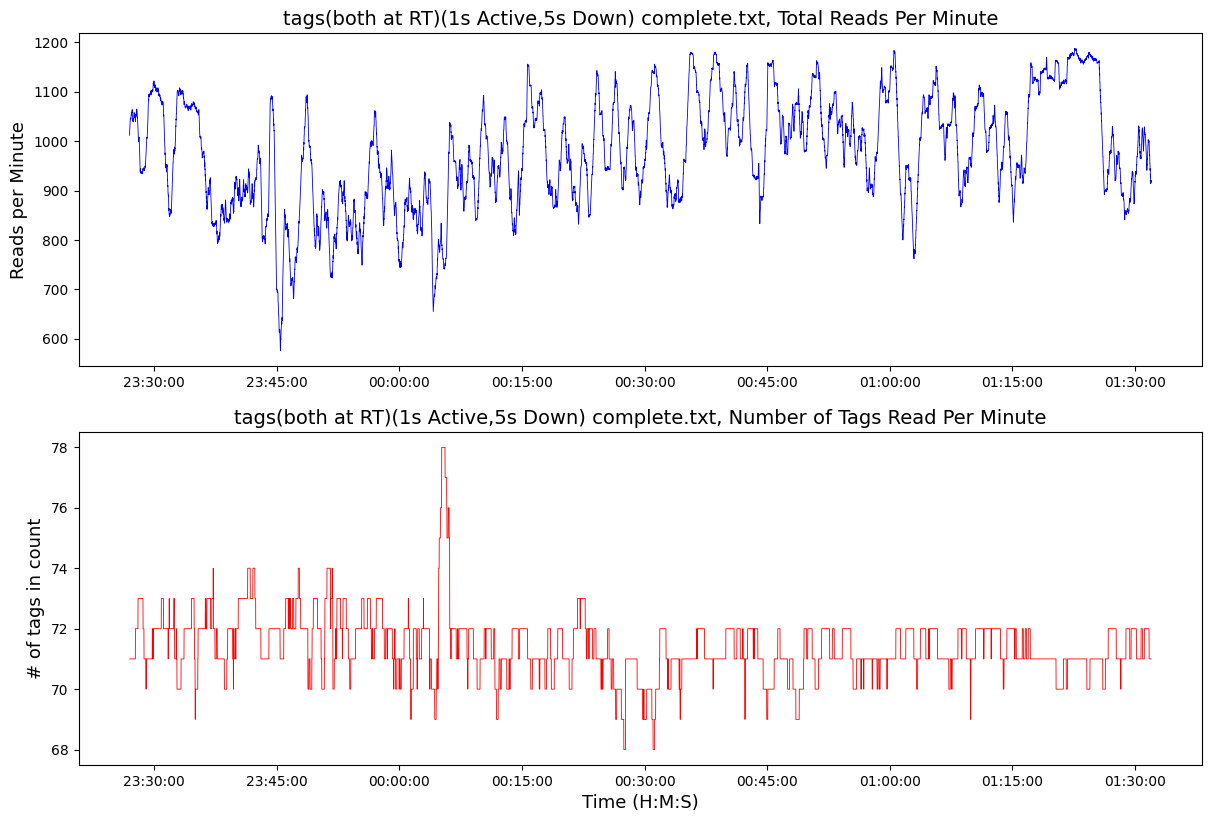

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14.5, 9.5))
ax1.plot(times, counts, "blue", linewidth=0.6, label="Reads per minute")
ax2.plot(times, tags, "red", linewidth=0.6, label="# of tags in count")
ax2.set_xlabel("Time (H:M:S)", fontsize=13)
ax1.set_ylabel("Reads per Minute", fontsize=13)
ax1.set_title("tags(1s active,1s down)(autosave apk).txt, Total Reads Per Minute", fontsize=14)
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
ax2.set_ylabel("# of tags in count", fontsize=13)
ax2.set_title("tags(1s active,1s down)(autosave apk).txt, Number of Tags Read Per Minute", fontsize=14)

Text(0.5, 1.0, 'tags(both at RT)(1s Active,5s Down) complete.txt, Reads per Minute by Tag')

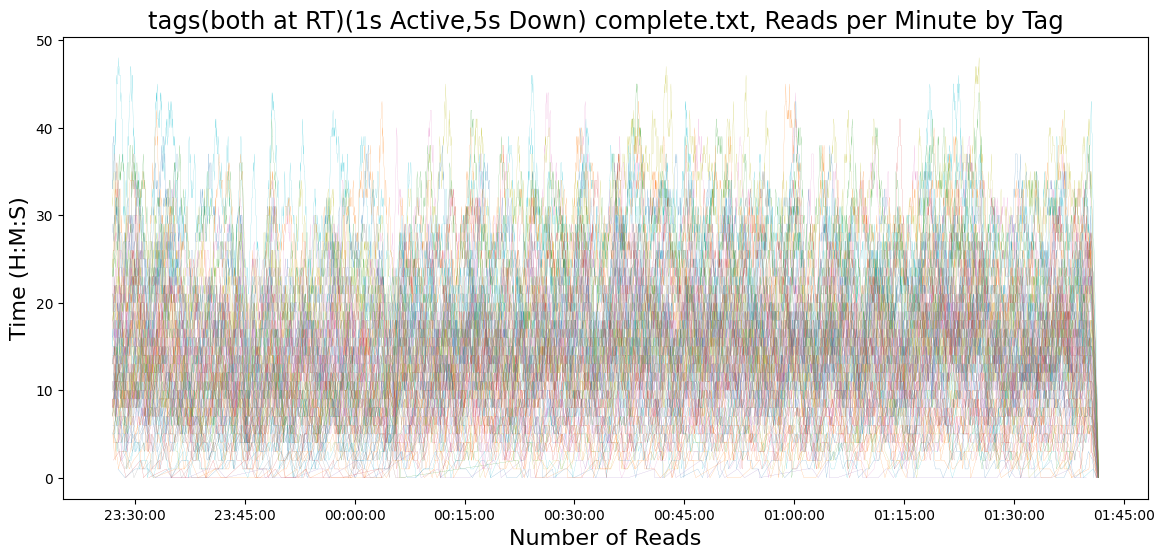

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
ax.xaxis.set_major_formatter(myFmt)

for i,j in vs.items():
    ax.plot(j[1], j[0], linewidth=0.1, label=i)
ax.set_xlabel("Number of Reads", fontsize=16)
ax.set_ylabel("Time (H:M:S)", fontsize=16)
ax.set_title("tags(both at RT)(1s Active,5s Down) complete.txt, Reads per Minute by Tag", fontsize=17.5)